# Experiments on model_l6_fc_1
In this step of experiments, we start on model_l6_fc_1, which has 3 Conv layers and 3 FC layers, and its variations. For training we will use lr = 0.01 and momentum = 0.9

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms
import os
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import time

In [2]:
batch_size = 100
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(128),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])}
data_dir = '/input'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                             shuffle=True,num_workers=4)
              for x in ['train']}

The code in the document can be found: http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [3]:
# batch_size = 100#batch_size will be used to get accuracy
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize(96),
#         transforms.CenterCrop(128),
#         transforms.Grayscale(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'test': transforms.Compose([
#         transforms.Resize(96),
#         transforms.CenterCrop(128),
#         transforms.Grayscale(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'validation': transforms.Compose([
#         transforms.Resize(96),
#         transforms.CenterCrop(128),
#         transforms.Grayscale(),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ])
# }
# data_dir = '/input/data'
# image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
#                                           data_transforms[x])
#                   for x in ['train','test','validation']}
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
#                                              shuffle=True,num_workers=4)
#               for x in ['train','test','validation']}

In [4]:
class ConvNet_L6(nn.Module):#this model is same as model_l6_fc_1, we rename it as ConvNet_L6 to keep consistency with annotation on paper
    def __init__(self):
        super(ConvNet_L6, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.fc1 = nn.Linear(16*16*128,4000)#compared to model_l6 in the previous step, model_l6_fc_1 only changes FC layers
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = x.view(-1, 16*16*128)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [5]:
class ConvNet_L7(nn.Module):
    def __init__(self):
        super(ConvNet_L7, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [6]:
class ConvNet_L7Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L7Plus, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 64, 3, 1, 1) 
        self.conv2 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4 = nn.Conv2d(256, 512, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*512,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*512)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [7]:
class ConvNet_L9(nn.Module):
    def __init__(self):
        super(ConvNet_L9, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv4 = nn.Conv2d(128, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x))
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv3(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [8]:
class ConvNet_L9Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L9Plus, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.max_pool2d(F.relu(self.conv1(x)), 2, 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.max_pool2d(F.relu(self.conv4_2(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [9]:
class ConvNet_L11(nn.Module):
    def __init__(self):
        super(ConvNet_L11, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x))
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.max_pool2d(F.relu(self.conv4_2(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [10]:
class ConvNet_L11Plus(nn.Module):
    def __init__(self):
        super(ConvNet_L11Plus, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.conv1_1_bn = nn.BatchNorm2d(32)
        self.conv1_2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv1_2_bn = nn.BatchNorm2d(32)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_1_bn = nn.BatchNorm2d(64)
        self.conv2_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv2_2_bn = nn.BatchNorm2d(64)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_1_bn = nn.BatchNorm2d(128)
        self.conv3_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv3_2_bn = nn.BatchNorm2d(128)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_1_bn = nn.BatchNorm2d(256)
        self.conv4_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv4_2_bn = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1_bn(self.conv1_1(x)))
        x = F.max_pool2d(F.relu(self.conv1_2_bn(self.conv1_2(x))), 2, 2)
        x = F.relu(self.conv2_1_bn(self.conv2_1(x)))
        x = F.max_pool2d(F.relu(self.conv2_2_bn(self.conv2_2(x))), 2, 2)
        x = F.relu(self.conv3_1_bn(self.conv3_1(x)))
        x = F.max_pool2d(F.relu(self.conv3_2_bn(self.conv3_2(x))), 2, 2)
        x = F.relu(self.conv4_1_bn(self.conv4_1(x)))
        x = F.max_pool2d(F.relu(self.conv4_2_bn(self.conv4_2(x))), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

In [11]:
class ConvNet_L13(nn.Module):
    def __init__(self):
        super(ConvNet_L13, self).__init__()
        self.all_losses = []
        self.all_accuracy = []
        self.conv1_1 = nn.Conv2d(1, 32, 3, 1, 1) 
        self.conv1_2 = nn.Conv2d(32, 32, 3, 1, 1)
        self.conv2_1 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv2_2 = nn.Conv2d(64, 64, 3, 1, 1)
        self.conv3_1 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, 1, 1)
        self.conv4_1 = nn.Conv2d(128, 256, 3, 1, 1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv4_3 = nn.Conv2d(256, 256, 3, 1, 1)
        self.conv4_4 = nn.Conv2d(256, 256, 3, 1, 1)
        self.fc1 = nn.Linear(8*8*256,4000)
        self.fc2 = nn.Linear(4000,1024)
        self.fc3 = nn.Linear(1024, 100)

    def forward(self, x):
        x = x.view(-1,1,128,128)
        x = F.relu(self.conv1_1(x))
        x = F.max_pool2d(F.relu(self.conv1_2(x)), 2, 2)
        x = F.relu(self.conv2_1(x))
        x = F.max_pool2d(F.relu(self.conv2_2(x)), 2, 2)
        x = F.relu(self.conv3_1(x))
        x = F.max_pool2d(F.relu(self.conv3_2(x)), 2, 2)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = F.max_pool2d(F.relu(self.conv4_4(x)), 2, 2)
        x = x.view(-1, 8*8*256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim = 1)

define a helper function that helps us calculate accuracy

In [12]:
def AccuracyHelper(model,dataset):
    count = 0
    for batch_idx, (data,target) in enumerate(dataset):
        data, target = Variable(data.cuda()), Variable(target.cuda())
        y_pred = model(data)#model
        prediction = torch.max(F.softmax(y_pred), 1)[1]
        pred_y = prediction.cpu().data.numpy().squeeze()
        target_y = target.cpu().data.numpy()
        count += sum(pred_y == target_y)
    print('accuracy on testset: {}%'.format(100*float(count)/float(batch_size*len(dataset))),count)

set training process with lr = 0.01, momentum = 0.9, epoch = 10 for every model training.

In [13]:
class Training():
    def __init__(self,dataloaders,ConvNet,lr = 0.01, epoch = 15):
        self.criteria = nn.CrossEntropyLoss()
        self.model = ConvNet
        self.optimizer = optim.SGD(ConvNet.parameters(), lr=lr, momentum=0.9)
        self.log_interval=10#log_interval * batch_size = the number of displayed samples
        self.epoch = epoch
        self.data = dataloaders
        self.ConvNet = ConvNet
        
    def start(self):
        for epoch in range(self.epoch):#set epoch of iteration
            for batch_idx, (data,target) in enumerate(self.data['train']):
                data, target = Variable(data.cuda()), Variable(target.cuda())#turn x,y from tensors to Variables
                y_pred = self.model(data)#feed x, return prediction on the sample
                prediction = torch.max(F.softmax(y_pred), 1)[1]
                pred_y = prediction.cpu().data.numpy().squeeze()
                target_y = target.cpu().data.numpy()
                loss = self.criteria(y_pred, target)#cal loss
                self.optimizer.zero_grad()#set all gradient to 0
                loss.backward()#begin backprop
                self.optimizer.step()#cal grad
                if batch_idx % self.log_interval == 0:#display progress
                    accuracy = sum(pred_y == target_y) / 100.0
                    self.ConvNet.all_losses.append(loss.data[0])
                    self.ConvNet.all_accuracy.append(accuracy)
                    print('Train Epoch: {} [{}/{} ({:.3f}%)]\tLoss: {:.6f}\tAccuracy: {:.3f}'.format(
                        epoch, batch_size*batch_idx, batch_size*len(self.data['train']),
                        100. * batch_idx / len(self.data['train']), loss.data[0], accuracy))
#         AccuracyHelper(self.model, data['test'])

### Load in models. when you have tuned your model classes, don't forget to reload models here!!! (Don't ask me why I mention this...)

In [14]:
model_l6  = ConvNet_L6()
model_l6.cuda()
model_l7  = ConvNet_L7()
model_l7.cuda()
model_l7p = ConvNet_L7Plus()
model_l7p.cuda()
model_l9  = ConvNet_L9()
model_l9.cuda()
model_l9p = ConvNet_L9Plus()
model_l9p.cuda()
model_l11 = ConvNet_L11()
model_l11.cuda()
model_l11p= ConvNet_L11Plus()
model_l11p.cuda()
model_l13 = ConvNet_L13()
model_l13.cuda()

ConvNet_L13(
  (conv1_1): Conv2d (1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d (32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d (32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d (64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d (64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_1): Conv2d (128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_3): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_4): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=4000)
  (fc2): Linear(in_features=4000, out_features=1024)
  (fc3): Linear(in_features=1024, out_features=100)
)

In [15]:
start_time = time.time()
train = Training(dataloaders, model_l6, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.604943	Accuracy: 0.030
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.601175	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.605758	Accuracy: 0.000
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.590551	Accuracy: 0.000
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.618929	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.599813	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.604110	Accuracy: 0.020
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.605562	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.596725	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.597323	Accuracy: 0.020
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.606564	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.606133	Accuracy: 0.010
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.579670	Accuracy: 0.060
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.578016	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.085726	Accuracy: 0.710
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.740887	Accuracy: 0.780
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.462188	Accuracy: 0.910
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.383173	Accuracy: 0.850
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.522359	Accuracy: 0.850
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.468110	Accuracy: 0.880
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.359092	Accuracy: 0.940
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.528307	Accuracy: 0.850
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.326285	Accuracy: 0.920
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.472538	Accuracy: 0.860
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.397160	Accuracy: 0.900
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.402817	Accuracy: 0.920
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.497047	Accuracy: 0.860
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.292182	Accuracy: 0.940
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.149981	Accuracy: 0.950
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.110465	Accuracy: 0.940
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.201947	Accuracy: 0.940
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.112613	Accuracy: 0.970
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.078693	Accuracy: 0.980
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.071205	Accuracy: 0.960
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.013640	Accuracy: 1.000
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.025158	Accuracy: 1.000
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.054594	Accuracy: 0.970
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.118823	Accuracy: 0.960
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.050295	Accuracy: 0.980
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.056995	Accuracy: 0.980
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.026788	Accuracy: 1.000
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.033944	Accuracy: 0.990
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.065462	Accuracy: 0.990
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.043060	Accuracy: 0.990
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.015930	Accuracy: 1.000
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.015095	Accuracy: 0.990
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.023983	Accuracy: 1.000
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.017671	Accuracy: 1.000
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.048375	Accuracy: 0.980
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.037421	Accuracy: 0.980
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.013642	Accuracy: 1.000
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.018862	Accuracy: 0.990
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.012405	Accuracy: 0.990
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.007378	Accuracy: 1.000
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.043092	Accuracy: 0.990
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.006857	Accuracy: 1.000
Train Epoch: 9 [8000/40000 (20.000%

Train Epoch: 11 [31000/40000 (77.500%)]	Loss: 0.083683	Accuracy: 0.980
Train Epoch: 11 [32000/40000 (80.000%)]	Loss: 0.020941	Accuracy: 0.990
Train Epoch: 11 [33000/40000 (82.500%)]	Loss: 0.082325	Accuracy: 0.990
Train Epoch: 11 [34000/40000 (85.000%)]	Loss: 0.018581	Accuracy: 0.990
Train Epoch: 11 [35000/40000 (87.500%)]	Loss: 0.028759	Accuracy: 0.980
Train Epoch: 11 [36000/40000 (90.000%)]	Loss: 0.030311	Accuracy: 1.000
Train Epoch: 11 [37000/40000 (92.500%)]	Loss: 0.001380	Accuracy: 1.000
Train Epoch: 11 [38000/40000 (95.000%)]	Loss: 0.005280	Accuracy: 1.000
Train Epoch: 11 [39000/40000 (97.500%)]	Loss: 0.074103	Accuracy: 0.990
Train Epoch: 12 [0/40000 (0.000%)]	Loss: 0.019127	Accuracy: 0.990
Train Epoch: 12 [1000/40000 (2.500%)]	Loss: 0.005096	Accuracy: 1.000
Train Epoch: 12 [2000/40000 (5.000%)]	Loss: 0.001923	Accuracy: 1.000
Train Epoch: 12 [3000/40000 (7.500%)]	Loss: 0.002074	Accuracy: 1.000
Train Epoch: 12 [4000/40000 (10.000%)]	Loss: 0.000916	Accuracy: 1.000
Train Epoch: 12 [5

Train Epoch: 14 [28000/40000 (70.000%)]	Loss: 0.018898	Accuracy: 0.990
Train Epoch: 14 [29000/40000 (72.500%)]	Loss: 0.003619	Accuracy: 1.000
Train Epoch: 14 [30000/40000 (75.000%)]	Loss: 0.001755	Accuracy: 1.000
Train Epoch: 14 [31000/40000 (77.500%)]	Loss: 0.003175	Accuracy: 1.000
Train Epoch: 14 [32000/40000 (80.000%)]	Loss: 0.001604	Accuracy: 1.000
Train Epoch: 14 [33000/40000 (82.500%)]	Loss: 0.014800	Accuracy: 0.990
Train Epoch: 14 [34000/40000 (85.000%)]	Loss: 0.142097	Accuracy: 0.990
Train Epoch: 14 [35000/40000 (87.500%)]	Loss: 0.005993	Accuracy: 1.000
Train Epoch: 14 [36000/40000 (90.000%)]	Loss: 0.002943	Accuracy: 1.000
Train Epoch: 14 [37000/40000 (92.500%)]	Loss: 0.002002	Accuracy: 1.000
Train Epoch: 14 [38000/40000 (95.000%)]	Loss: 0.000874	Accuracy: 1.000
Train Epoch: 14 [39000/40000 (97.500%)]	Loss: 0.000350	Accuracy: 1.000
--- 1674.2981667518616 seconds ---


In [16]:
start_time = time.time()
train = Training(dataloaders, model_l7, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.605487	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.605753	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.602421	Accuracy: 0.020
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.604548	Accuracy: 0.010
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.606544	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.606637	Accuracy: 0.020
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.601339	Accuracy: 0.020
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.604489	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.604547	Accuracy: 0.010
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.605121	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.604452	Accuracy: 0.010
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.606128	Accuracy: 0.000
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.600081	Accuracy: 0.020
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.601570	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 1.433803	Accuracy: 0.640
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.903966	Accuracy: 0.720
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.872341	Accuracy: 0.770
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.706822	Accuracy: 0.780
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.664470	Accuracy: 0.830
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.669971	Accuracy: 0.830
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.653097	Accuracy: 0.830
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.715816	Accuracy: 0.830
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.745068	Accuracy: 0.770
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.651934	Accuracy: 0.830
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.616314	Accuracy: 0.840
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.644873	Accuracy: 0.820
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.739388	Accuracy: 0.800
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.939025	Accuracy: 0.740
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.308426	Accuracy: 0.920
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.169639	Accuracy: 0.950
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.344000	Accuracy: 0.930
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.159631	Accuracy: 0.970
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.083962	Accuracy: 0.970
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.174317	Accuracy: 0.960
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.195822	Accuracy: 0.960
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.124163	Accuracy: 0.940
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.111127	Accuracy: 0.980
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.091135	Accuracy: 0.970
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.054466	Accuracy: 0.970
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.098414	Accuracy: 0.940
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.157901	Accuracy: 0.950
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.197704	Accuracy: 0.960
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.019875	Accuracy: 1.000
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.069023	Accuracy: 0.980
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.256758	Accuracy: 0.930
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.046650	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.081237	Accuracy: 0.970
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.021570	Accuracy: 1.000
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.051518	Accuracy: 0.990
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.010926	Accuracy: 1.000
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.073247	Accuracy: 0.980
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.065863	Accuracy: 0.970
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.006709	Accuracy: 1.000
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.003263	Accuracy: 1.000
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.009085	Accuracy: 1.000
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.005991	Accuracy: 1.000
Train Epoch: 9 [8000/40000 (20.000%

Train Epoch: 11 [31000/40000 (77.500%)]	Loss: 0.002070	Accuracy: 1.000
Train Epoch: 11 [32000/40000 (80.000%)]	Loss: 0.068943	Accuracy: 0.990
Train Epoch: 11 [33000/40000 (82.500%)]	Loss: 0.020055	Accuracy: 0.990
Train Epoch: 11 [34000/40000 (85.000%)]	Loss: 0.006676	Accuracy: 1.000
Train Epoch: 11 [35000/40000 (87.500%)]	Loss: 0.008054	Accuracy: 1.000
Train Epoch: 11 [36000/40000 (90.000%)]	Loss: 0.043675	Accuracy: 0.980
Train Epoch: 11 [37000/40000 (92.500%)]	Loss: 0.003765	Accuracy: 1.000
Train Epoch: 11 [38000/40000 (95.000%)]	Loss: 0.003044	Accuracy: 1.000
Train Epoch: 11 [39000/40000 (97.500%)]	Loss: 0.005470	Accuracy: 1.000
Train Epoch: 12 [0/40000 (0.000%)]	Loss: 0.035113	Accuracy: 0.990
Train Epoch: 12 [1000/40000 (2.500%)]	Loss: 0.012870	Accuracy: 0.990
Train Epoch: 12 [2000/40000 (5.000%)]	Loss: 0.002299	Accuracy: 1.000
Train Epoch: 12 [3000/40000 (7.500%)]	Loss: 0.033090	Accuracy: 0.990
Train Epoch: 12 [4000/40000 (10.000%)]	Loss: 0.000973	Accuracy: 1.000
Train Epoch: 12 [5

Train Epoch: 14 [28000/40000 (70.000%)]	Loss: 0.000520	Accuracy: 1.000
Train Epoch: 14 [29000/40000 (72.500%)]	Loss: 0.001258	Accuracy: 1.000
Train Epoch: 14 [30000/40000 (75.000%)]	Loss: 0.002754	Accuracy: 1.000
Train Epoch: 14 [31000/40000 (77.500%)]	Loss: 0.019947	Accuracy: 1.000
Train Epoch: 14 [32000/40000 (80.000%)]	Loss: 0.004269	Accuracy: 1.000
Train Epoch: 14 [33000/40000 (82.500%)]	Loss: 0.000629	Accuracy: 1.000
Train Epoch: 14 [34000/40000 (85.000%)]	Loss: 0.013421	Accuracy: 0.990
Train Epoch: 14 [35000/40000 (87.500%)]	Loss: 0.002280	Accuracy: 1.000
Train Epoch: 14 [36000/40000 (90.000%)]	Loss: 0.012661	Accuracy: 1.000
Train Epoch: 14 [37000/40000 (92.500%)]	Loss: 0.005039	Accuracy: 1.000
Train Epoch: 14 [38000/40000 (95.000%)]	Loss: 0.001424	Accuracy: 1.000
Train Epoch: 14 [39000/40000 (97.500%)]	Loss: 0.001051	Accuracy: 1.000
--- 1580.873440027237 seconds ---


In [17]:
start_time = time.time()
train = Training(dataloaders, model_l7p, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.607960	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.606148	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.605742	Accuracy: 0.000
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.604904	Accuracy: 0.010
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.605111	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.599911	Accuracy: 0.020
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.598073	Accuracy: 0.000
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.605822	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.599519	Accuracy: 0.000
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.601517	Accuracy: 0.020
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.602767	Accuracy: 0.020
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.606904	Accuracy: 0.020
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.600542	Accuracy: 0.020
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.610314	Accuracy: 0.010
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.851196	Accuracy: 0.750
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.755574	Accuracy: 0.790
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.350805	Accuracy: 0.910
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.553081	Accuracy: 0.850
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.422739	Accuracy: 0.850
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.531151	Accuracy: 0.850
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.730532	Accuracy: 0.830
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.496189	Accuracy: 0.850
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.488793	Accuracy: 0.830
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.467724	Accuracy: 0.880
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.461052	Accuracy: 0.880
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.561478	Accuracy: 0.840
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.523551	Accuracy: 0.830
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.591669	Accuracy: 0.860
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.122438	Accuracy: 0.970
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.087000	Accuracy: 0.980
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.085282	Accuracy: 0.970
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.203792	Accuracy: 0.960
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.060652	Accuracy: 0.970
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.046951	Accuracy: 0.980
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.072298	Accuracy: 0.980
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.018120	Accuracy: 1.000
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.174098	Accuracy: 0.950
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.042162	Accuracy: 0.980
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.051453	Accuracy: 0.980
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.024614	Accuracy: 0.990
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.023645	Accuracy: 1.000
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.045579	Accuracy: 0.980
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.003936	Accuracy: 1.000
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.092081	Accuracy: 0.980
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.051617	Accuracy: 0.980
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.026855	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.225118	Accuracy: 0.970
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.045797	Accuracy: 0.990
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.023094	Accuracy: 0.990
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.014668	Accuracy: 0.990
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.037467	Accuracy: 0.990
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.046835	Accuracy: 0.980
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.005721	Accuracy: 1.000
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.004561	Accuracy: 1.000
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.048655	Accuracy: 0.990
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.026808	Accuracy: 0.990
Train Epoch: 9 [8000/40000 (20.000%

Train Epoch: 11 [31000/40000 (77.500%)]	Loss: 0.004662	Accuracy: 1.000
Train Epoch: 11 [32000/40000 (80.000%)]	Loss: 0.001404	Accuracy: 1.000
Train Epoch: 11 [33000/40000 (82.500%)]	Loss: 0.000624	Accuracy: 1.000
Train Epoch: 11 [34000/40000 (85.000%)]	Loss: 0.003037	Accuracy: 1.000
Train Epoch: 11 [35000/40000 (87.500%)]	Loss: 0.002168	Accuracy: 1.000
Train Epoch: 11 [36000/40000 (90.000%)]	Loss: 0.000876	Accuracy: 1.000
Train Epoch: 11 [37000/40000 (92.500%)]	Loss: 0.018502	Accuracy: 0.990
Train Epoch: 11 [38000/40000 (95.000%)]	Loss: 0.003606	Accuracy: 1.000
Train Epoch: 11 [39000/40000 (97.500%)]	Loss: 0.011138	Accuracy: 0.990
Train Epoch: 12 [0/40000 (0.000%)]	Loss: 0.018774	Accuracy: 1.000
Train Epoch: 12 [1000/40000 (2.500%)]	Loss: 0.055281	Accuracy: 0.970
Train Epoch: 12 [2000/40000 (5.000%)]	Loss: 0.026229	Accuracy: 0.990
Train Epoch: 12 [3000/40000 (7.500%)]	Loss: 0.016883	Accuracy: 0.990
Train Epoch: 12 [4000/40000 (10.000%)]	Loss: 0.039485	Accuracy: 0.980
Train Epoch: 12 [5

Train Epoch: 14 [28000/40000 (70.000%)]	Loss: 0.007304	Accuracy: 1.000
Train Epoch: 14 [29000/40000 (72.500%)]	Loss: 0.032944	Accuracy: 0.990
Train Epoch: 14 [30000/40000 (75.000%)]	Loss: 0.001477	Accuracy: 1.000
Train Epoch: 14 [31000/40000 (77.500%)]	Loss: 0.079416	Accuracy: 0.970
Train Epoch: 14 [32000/40000 (80.000%)]	Loss: 0.034758	Accuracy: 0.990
Train Epoch: 14 [33000/40000 (82.500%)]	Loss: 0.000856	Accuracy: 1.000
Train Epoch: 14 [34000/40000 (85.000%)]	Loss: 0.053178	Accuracy: 0.990
Train Epoch: 14 [35000/40000 (87.500%)]	Loss: 0.000661	Accuracy: 1.000
Train Epoch: 14 [36000/40000 (90.000%)]	Loss: 0.000790	Accuracy: 1.000
Train Epoch: 14 [37000/40000 (92.500%)]	Loss: 0.009335	Accuracy: 0.990
Train Epoch: 14 [38000/40000 (95.000%)]	Loss: 0.027532	Accuracy: 0.990
Train Epoch: 14 [39000/40000 (97.500%)]	Loss: 0.009119	Accuracy: 1.000
--- 2098.152181625366 seconds ---


In [18]:
start_time = time.time()
train = Training(dataloaders, model_l9, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.606089	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.604784	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.604944	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.604742	Accuracy: 0.010
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.607428	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.605247	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.607356	Accuracy: 0.020
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.603487	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.608112	Accuracy: 0.020
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.604658	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.601695	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.607508	Accuracy: 0.010
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.606119	Accuracy: 0.020
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.605582	Accuracy: 0.020
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 3 [32000/40000 (80.000%)]	Loss: 0.763863	Accuracy: 0.800
Train Epoch: 3 [33000/40000 (82.500%)]	Loss: 0.840940	Accuracy: 0.770
Train Epoch: 3 [34000/40000 (85.000%)]	Loss: 0.965531	Accuracy: 0.720
Train Epoch: 3 [35000/40000 (87.500%)]	Loss: 0.972219	Accuracy: 0.690
Train Epoch: 3 [36000/40000 (90.000%)]	Loss: 0.986526	Accuracy: 0.740
Train Epoch: 3 [37000/40000 (92.500%)]	Loss: 1.129487	Accuracy: 0.670
Train Epoch: 3 [38000/40000 (95.000%)]	Loss: 0.785536	Accuracy: 0.820
Train Epoch: 3 [39000/40000 (97.500%)]	Loss: 0.837546	Accuracy: 0.750
Train Epoch: 4 [0/40000 (0.000%)]	Loss: 0.523882	Accuracy: 0.900
Train Epoch: 4 [1000/40000 (2.500%)]	Loss: 0.430095	Accuracy: 0.870
Train Epoch: 4 [2000/40000 (5.000%)]	Loss: 0.356794	Accuracy: 0.930
Train Epoch: 4 [3000/40000 (7.500%)]	Loss: 0.476712	Accuracy: 0.860
Train Epoch: 4 [4000/40000 (10.000%)]	Loss: 0.489862	Accuracy: 0.910
Train Epoch: 4 [5000/40000 (12.500%)]	Loss: 0.442024	Accuracy: 0.870
Train Epoch: 4 [6000/40000 (15.00

Train Epoch: 6 [30000/40000 (75.000%)]	Loss: 0.219966	Accuracy: 0.950
Train Epoch: 6 [31000/40000 (77.500%)]	Loss: 0.165195	Accuracy: 0.940
Train Epoch: 6 [32000/40000 (80.000%)]	Loss: 0.096423	Accuracy: 0.970
Train Epoch: 6 [33000/40000 (82.500%)]	Loss: 0.203671	Accuracy: 0.910
Train Epoch: 6 [34000/40000 (85.000%)]	Loss: 0.178982	Accuracy: 0.940
Train Epoch: 6 [35000/40000 (87.500%)]	Loss: 0.267566	Accuracy: 0.910
Train Epoch: 6 [36000/40000 (90.000%)]	Loss: 0.215792	Accuracy: 0.920
Train Epoch: 6 [37000/40000 (92.500%)]	Loss: 0.200970	Accuracy: 0.940
Train Epoch: 6 [38000/40000 (95.000%)]	Loss: 0.109750	Accuracy: 0.960
Train Epoch: 6 [39000/40000 (97.500%)]	Loss: 0.175089	Accuracy: 0.940
Train Epoch: 7 [0/40000 (0.000%)]	Loss: 0.115068	Accuracy: 0.960
Train Epoch: 7 [1000/40000 (2.500%)]	Loss: 0.130333	Accuracy: 0.980
Train Epoch: 7 [2000/40000 (5.000%)]	Loss: 0.046518	Accuracy: 0.980
Train Epoch: 7 [3000/40000 (7.500%)]	Loss: 0.103371	Accuracy: 0.970
Train Epoch: 7 [4000/40000 (10.

Train Epoch: 9 [28000/40000 (70.000%)]	Loss: 0.024116	Accuracy: 0.980
Train Epoch: 9 [29000/40000 (72.500%)]	Loss: 0.058820	Accuracy: 0.990
Train Epoch: 9 [30000/40000 (75.000%)]	Loss: 0.022551	Accuracy: 1.000
Train Epoch: 9 [31000/40000 (77.500%)]	Loss: 0.036967	Accuracy: 0.980
Train Epoch: 9 [32000/40000 (80.000%)]	Loss: 0.047119	Accuracy: 0.980
Train Epoch: 9 [33000/40000 (82.500%)]	Loss: 0.012643	Accuracy: 0.990
Train Epoch: 9 [34000/40000 (85.000%)]	Loss: 0.020571	Accuracy: 0.990
Train Epoch: 9 [35000/40000 (87.500%)]	Loss: 0.048503	Accuracy: 0.980
Train Epoch: 9 [36000/40000 (90.000%)]	Loss: 0.019992	Accuracy: 0.990
Train Epoch: 9 [37000/40000 (92.500%)]	Loss: 0.002296	Accuracy: 1.000
Train Epoch: 9 [38000/40000 (95.000%)]	Loss: 0.015811	Accuracy: 0.990
Train Epoch: 9 [39000/40000 (97.500%)]	Loss: 0.037135	Accuracy: 0.980
Train Epoch: 10 [0/40000 (0.000%)]	Loss: 0.025202	Accuracy: 0.990
Train Epoch: 10 [1000/40000 (2.500%)]	Loss: 0.038918	Accuracy: 0.990
Train Epoch: 10 [2000/400

Train Epoch: 12 [25000/40000 (62.500%)]	Loss: 0.053296	Accuracy: 0.990
Train Epoch: 12 [26000/40000 (65.000%)]	Loss: 0.004453	Accuracy: 1.000
Train Epoch: 12 [27000/40000 (67.500%)]	Loss: 0.014414	Accuracy: 0.990
Train Epoch: 12 [28000/40000 (70.000%)]	Loss: 0.001004	Accuracy: 1.000
Train Epoch: 12 [29000/40000 (72.500%)]	Loss: 0.003924	Accuracy: 1.000
Train Epoch: 12 [30000/40000 (75.000%)]	Loss: 0.000290	Accuracy: 1.000
Train Epoch: 12 [31000/40000 (77.500%)]	Loss: 0.010624	Accuracy: 1.000
Train Epoch: 12 [32000/40000 (80.000%)]	Loss: 0.009368	Accuracy: 1.000
Train Epoch: 12 [33000/40000 (82.500%)]	Loss: 0.041036	Accuracy: 0.990
Train Epoch: 12 [34000/40000 (85.000%)]	Loss: 0.120630	Accuracy: 0.950
Train Epoch: 12 [35000/40000 (87.500%)]	Loss: 0.052604	Accuracy: 0.990
Train Epoch: 12 [36000/40000 (90.000%)]	Loss: 0.009206	Accuracy: 1.000
Train Epoch: 12 [37000/40000 (92.500%)]	Loss: 0.048144	Accuracy: 0.990
Train Epoch: 12 [38000/40000 (95.000%)]	Loss: 0.008843	Accuracy: 1.000
Train 

In [19]:
start_time = time.time()
train = Training(dataloaders, model_l9p, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.605997	Accuracy: 0.020
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.603327	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.605569	Accuracy: 0.030
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.605623	Accuracy: 0.010
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604762	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.603276	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.607726	Accuracy: 0.020
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.604527	Accuracy: 0.010
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.603284	Accuracy: 0.030
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.605455	Accuracy: 0.030
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.608337	Accuracy: 0.020
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.604497	Accuracy: 0.010
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.608288	Accuracy: 0.000
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.601141	Accuracy: 0.020
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 4.153198	Accuracy: 0.050
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 4.107843	Accuracy: 0.050
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 3.987550	Accuracy: 0.100
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 4.069120	Accuracy: 0.100
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 4.145062	Accuracy: 0.080
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 3.983138	Accuracy: 0.100
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 4.046052	Accuracy: 0.100
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 3.852458	Accuracy: 0.080
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 3.758035	Accuracy: 0.110
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 3.694511	Accuracy: 0.110
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 3.787338	Accuracy: 0.140
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 3.565255	Accuracy: 0.200
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 3.893060	Accuracy: 0.110
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 3.555551	Accuracy: 0.160
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.631854	Accuracy: 0.800
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.664404	Accuracy: 0.830
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.593295	Accuracy: 0.870
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.921172	Accuracy: 0.790
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.278778	Accuracy: 0.940
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.235545	Accuracy: 0.940
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.265413	Accuracy: 0.940
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.294263	Accuracy: 0.890
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.125959	Accuracy: 0.960
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.199942	Accuracy: 0.970
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.222617	Accuracy: 0.920
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.275545	Accuracy: 0.930
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.180093	Accuracy: 0.940
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.192431	Accuracy: 0.940
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.130555	Accuracy: 0.970
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.075414	Accuracy: 0.970
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.118854	Accuracy: 0.950
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.080733	Accuracy: 0.980
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.333857	Accuracy: 0.930
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.057770	Accuracy: 0.980
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.125271	Accuracy: 0.970
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.144074	Accuracy: 0.970
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.075539	Accuracy: 0.980
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.083549	Accuracy: 0.970
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.016626	Accuracy: 1.000
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.027060	Accuracy: 0.990
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.014855	Accuracy: 1.000
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.090714	Accuracy: 0.980
Train Epoch: 9 [8000/40000 (20.000%

Train Epoch: 11 [31000/40000 (77.500%)]	Loss: 0.016401	Accuracy: 1.000
Train Epoch: 11 [32000/40000 (80.000%)]	Loss: 0.045489	Accuracy: 0.990
Train Epoch: 11 [33000/40000 (82.500%)]	Loss: 0.034155	Accuracy: 0.990
Train Epoch: 11 [34000/40000 (85.000%)]	Loss: 0.014412	Accuracy: 1.000
Train Epoch: 11 [35000/40000 (87.500%)]	Loss: 0.005218	Accuracy: 1.000
Train Epoch: 11 [36000/40000 (90.000%)]	Loss: 0.011063	Accuracy: 1.000
Train Epoch: 11 [37000/40000 (92.500%)]	Loss: 0.025879	Accuracy: 0.990
Train Epoch: 11 [38000/40000 (95.000%)]	Loss: 0.059112	Accuracy: 0.980
Train Epoch: 11 [39000/40000 (97.500%)]	Loss: 0.029104	Accuracy: 0.990
Train Epoch: 12 [0/40000 (0.000%)]	Loss: 0.033794	Accuracy: 0.980
Train Epoch: 12 [1000/40000 (2.500%)]	Loss: 0.005436	Accuracy: 1.000
Train Epoch: 12 [2000/40000 (5.000%)]	Loss: 0.010992	Accuracy: 1.000
Train Epoch: 12 [3000/40000 (7.500%)]	Loss: 0.010238	Accuracy: 0.990
Train Epoch: 12 [4000/40000 (10.000%)]	Loss: 0.020069	Accuracy: 0.990
Train Epoch: 12 [5

Train Epoch: 14 [28000/40000 (70.000%)]	Loss: 0.004481	Accuracy: 1.000
Train Epoch: 14 [29000/40000 (72.500%)]	Loss: 0.052316	Accuracy: 0.980
Train Epoch: 14 [30000/40000 (75.000%)]	Loss: 0.026218	Accuracy: 0.990
Train Epoch: 14 [31000/40000 (77.500%)]	Loss: 0.068951	Accuracy: 0.990
Train Epoch: 14 [32000/40000 (80.000%)]	Loss: 0.001957	Accuracy: 1.000
Train Epoch: 14 [33000/40000 (82.500%)]	Loss: 0.055805	Accuracy: 0.990
Train Epoch: 14 [34000/40000 (85.000%)]	Loss: 0.011690	Accuracy: 1.000
Train Epoch: 14 [35000/40000 (87.500%)]	Loss: 0.045581	Accuracy: 0.990
Train Epoch: 14 [36000/40000 (90.000%)]	Loss: 0.006743	Accuracy: 1.000
Train Epoch: 14 [37000/40000 (92.500%)]	Loss: 0.095453	Accuracy: 0.980
Train Epoch: 14 [38000/40000 (95.000%)]	Loss: 0.003346	Accuracy: 1.000
Train Epoch: 14 [39000/40000 (97.500%)]	Loss: 0.036928	Accuracy: 0.990
--- 1926.5977158546448 seconds ---


In [20]:
start_time = time.time()
train = Training(dataloaders, model_l11, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.604302	Accuracy: 0.000
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.602779	Accuracy: 0.000
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.607491	Accuracy: 0.010
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.602959	Accuracy: 0.010
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.607405	Accuracy: 0.010
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.604554	Accuracy: 0.000
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.602154	Accuracy: 0.030
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.604825	Accuracy: 0.020
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.604813	Accuracy: 0.020
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.606918	Accuracy: 0.000
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.610560	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.605509	Accuracy: 0.010
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.605230	Accuracy: 0.010
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.604426	Accuracy: 0.050
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 4.606621	Accuracy: 0.010
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 4.606302	Accuracy: 0.010
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 4.604932	Accuracy: 0.020
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 4.604949	Accuracy: 0.020
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 4.606157	Accuracy: 0.010
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 4.604679	Accuracy: 0.010
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 4.605958	Accuracy: 0.000
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 4.604933	Accuracy: 0.000
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 4.605157	Accuracy: 0.000
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 4.605646	Accuracy: 0.010
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 4.607150	Accuracy: 0.000
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 4.604769	Accuracy: 0.000
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 4.605500	Accuracy: 0.030
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 4.605039	Accuracy: 0.000
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 4.606188	Accuracy: 0.010
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 4.606743	Accuracy: 0.000
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 4.606314	Accuracy: 0.010
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 4.606386	Accuracy: 0.000
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 4.605152	Accuracy: 0.010
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 4.604726	Accuracy: 0.030
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 4.605335	Accuracy: 0.000
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 4.605478	Accuracy: 0.000
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 4.604768	Accuracy: 0.000
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 4.605281	Accuracy: 0.010
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 4.605424	Accuracy: 0.010
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 4.605720	Accuracy: 0.000
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 4.605218	Accuracy: 0.020
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 4.606499	Accuracy: 0.010
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 4.516514	Accuracy: 0.020
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 4.532169	Accuracy: 0.020
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 4.547825	Accuracy: 0.030
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 4.462374	Accuracy: 0.050
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 4.443795	Accuracy: 0.030
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 4.443810	Accuracy: 0.040
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 4.486625	Accuracy: 0.030
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 4.292984	Accuracy: 0.070
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 4.389571	Accuracy: 0.030
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 4.387972	Accuracy: 0.020
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 4.241430	Accuracy: 0.110
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 4.153759	Accuracy: 0.120
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 4.001881	Accuracy: 0.090
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 4.063698	Accuracy: 0.080
Train Epoch: 9 [8000/40000 (20.000%

Train Epoch: 11 [31000/40000 (77.500%)]	Loss: 0.893827	Accuracy: 0.760
Train Epoch: 11 [32000/40000 (80.000%)]	Loss: 0.750213	Accuracy: 0.790
Train Epoch: 11 [33000/40000 (82.500%)]	Loss: 0.793792	Accuracy: 0.730
Train Epoch: 11 [34000/40000 (85.000%)]	Loss: 0.608519	Accuracy: 0.830
Train Epoch: 11 [35000/40000 (87.500%)]	Loss: 0.708017	Accuracy: 0.760
Train Epoch: 11 [36000/40000 (90.000%)]	Loss: 0.542853	Accuracy: 0.860
Train Epoch: 11 [37000/40000 (92.500%)]	Loss: 0.755369	Accuracy: 0.820
Train Epoch: 11 [38000/40000 (95.000%)]	Loss: 0.721123	Accuracy: 0.790
Train Epoch: 11 [39000/40000 (97.500%)]	Loss: 0.557496	Accuracy: 0.830
Train Epoch: 12 [0/40000 (0.000%)]	Loss: 0.354530	Accuracy: 0.930
Train Epoch: 12 [1000/40000 (2.500%)]	Loss: 0.235638	Accuracy: 0.940
Train Epoch: 12 [2000/40000 (5.000%)]	Loss: 0.286582	Accuracy: 0.900
Train Epoch: 12 [3000/40000 (7.500%)]	Loss: 0.232204	Accuracy: 0.940
Train Epoch: 12 [4000/40000 (10.000%)]	Loss: 0.205623	Accuracy: 0.940
Train Epoch: 12 [5

Train Epoch: 14 [28000/40000 (70.000%)]	Loss: 0.122623	Accuracy: 0.970
Train Epoch: 14 [29000/40000 (72.500%)]	Loss: 0.105465	Accuracy: 0.960
Train Epoch: 14 [30000/40000 (75.000%)]	Loss: 0.158973	Accuracy: 0.950
Train Epoch: 14 [31000/40000 (77.500%)]	Loss: 0.078367	Accuracy: 0.970
Train Epoch: 14 [32000/40000 (80.000%)]	Loss: 0.130769	Accuracy: 0.960
Train Epoch: 14 [33000/40000 (82.500%)]	Loss: 0.104114	Accuracy: 0.980
Train Epoch: 14 [34000/40000 (85.000%)]	Loss: 0.074537	Accuracy: 0.980
Train Epoch: 14 [35000/40000 (87.500%)]	Loss: 0.202669	Accuracy: 0.970
Train Epoch: 14 [36000/40000 (90.000%)]	Loss: 0.108118	Accuracy: 0.970
Train Epoch: 14 [37000/40000 (92.500%)]	Loss: 0.130451	Accuracy: 0.960
Train Epoch: 14 [38000/40000 (95.000%)]	Loss: 0.068300	Accuracy: 0.970
Train Epoch: 14 [39000/40000 (97.500%)]	Loss: 0.009654	Accuracy: 1.000
--- 2225.864326953888 seconds ---


In [21]:
start_time = time.time()
train = Training(dataloaders, model_l11p, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.600743	Accuracy: 0.010
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.621937	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.647030	Accuracy: 0.000
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.605213	Accuracy: 0.020
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.578166	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.592198	Accuracy: 0.030
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.541397	Accuracy: 0.020
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.572521	Accuracy: 0.020
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.464976	Accuracy: 0.040
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.265560	Accuracy: 0.070
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.373298	Accuracy: 0.010
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.183088	Accuracy: 0.070
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.026184	Accuracy: 0.090
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 3.963090	Accuracy: 0.130
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 0.573364	Accuracy: 0.890
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 0.735027	Accuracy: 0.850
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 0.258724	Accuracy: 0.930
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 0.472364	Accuracy: 0.880
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 0.452789	Accuracy: 0.870
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 0.290053	Accuracy: 0.940
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 0.312508	Accuracy: 0.920
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 0.348356	Accuracy: 0.930
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 0.317736	Accuracy: 0.950
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 0.391017	Accuracy: 0.880
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 0.359751	Accuracy: 0.880
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 0.189334	Accuracy: 0.950
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 0.337646	Accuracy: 0.940
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 0.462973	Accuracy: 0.850
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 0.067819	Accuracy: 0.990
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 0.167199	Accuracy: 0.960
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 0.262496	Accuracy: 0.930
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 0.045391	Accuracy: 0.980
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 0.094157	Accuracy: 0.970
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 0.080448	Accuracy: 0.990
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 0.020444	Accuracy: 1.000
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 0.032745	Accuracy: 1.000
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 0.043496	Accuracy: 0.990
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 0.024220	Accuracy: 1.000
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 0.048016	Accuracy: 0.990
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 0.041961	Accuracy: 0.990
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 0.051522	Accuracy: 1.000
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 0.060893	Accuracy: 0.990
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 0.002398	Accuracy: 1.000
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 0.002085	Accuracy: 1.000
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 0.005091	Accuracy: 1.000
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 0.005754	Accuracy: 1.000
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 0.007306	Accuracy: 1.000
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 0.003359	Accuracy: 1.000
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 0.004149	Accuracy: 1.000
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 0.001750	Accuracy: 1.000
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 0.001752	Accuracy: 1.000
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 0.001783	Accuracy: 1.000
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 0.002461	Accuracy: 1.000
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 0.005495	Accuracy: 1.000
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 0.003076	Accuracy: 1.000
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 0.002370	Accuracy: 1.000
Train Epoch: 9 [8000/40000 (20.000%

Train Epoch: 11 [31000/40000 (77.500%)]	Loss: 0.002853	Accuracy: 1.000
Train Epoch: 11 [32000/40000 (80.000%)]	Loss: 0.045137	Accuracy: 0.990
Train Epoch: 11 [33000/40000 (82.500%)]	Loss: 0.001308	Accuracy: 1.000
Train Epoch: 11 [34000/40000 (85.000%)]	Loss: 0.001515	Accuracy: 1.000
Train Epoch: 11 [35000/40000 (87.500%)]	Loss: 0.004636	Accuracy: 1.000
Train Epoch: 11 [36000/40000 (90.000%)]	Loss: 0.001298	Accuracy: 1.000
Train Epoch: 11 [37000/40000 (92.500%)]	Loss: 0.001015	Accuracy: 1.000
Train Epoch: 11 [38000/40000 (95.000%)]	Loss: 0.001315	Accuracy: 1.000
Train Epoch: 11 [39000/40000 (97.500%)]	Loss: 0.001442	Accuracy: 1.000
Train Epoch: 12 [0/40000 (0.000%)]	Loss: 0.001820	Accuracy: 1.000
Train Epoch: 12 [1000/40000 (2.500%)]	Loss: 0.001001	Accuracy: 1.000
Train Epoch: 12 [2000/40000 (5.000%)]	Loss: 0.015359	Accuracy: 0.990
Train Epoch: 12 [3000/40000 (7.500%)]	Loss: 0.001219	Accuracy: 1.000
Train Epoch: 12 [4000/40000 (10.000%)]	Loss: 0.001266	Accuracy: 1.000
Train Epoch: 12 [5

Train Epoch: 14 [28000/40000 (70.000%)]	Loss: 0.000601	Accuracy: 1.000
Train Epoch: 14 [29000/40000 (72.500%)]	Loss: 0.000614	Accuracy: 1.000
Train Epoch: 14 [30000/40000 (75.000%)]	Loss: 0.000695	Accuracy: 1.000
Train Epoch: 14 [31000/40000 (77.500%)]	Loss: 0.000780	Accuracy: 1.000
Train Epoch: 14 [32000/40000 (80.000%)]	Loss: 0.001151	Accuracy: 1.000
Train Epoch: 14 [33000/40000 (82.500%)]	Loss: 0.001035	Accuracy: 1.000
Train Epoch: 14 [34000/40000 (85.000%)]	Loss: 0.001892	Accuracy: 1.000
Train Epoch: 14 [35000/40000 (87.500%)]	Loss: 0.000487	Accuracy: 1.000
Train Epoch: 14 [36000/40000 (90.000%)]	Loss: 0.000523	Accuracy: 1.000
Train Epoch: 14 [37000/40000 (92.500%)]	Loss: 0.000500	Accuracy: 1.000
Train Epoch: 14 [38000/40000 (95.000%)]	Loss: 0.000419	Accuracy: 1.000
Train Epoch: 14 [39000/40000 (97.500%)]	Loss: 0.000628	Accuracy: 1.000
--- 2410.575834751129 seconds ---


In [22]:
start_time = time.time()
train = Training(dataloaders, model_l13, 0.01)
train.start()
print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/miniconda3/envs/dl/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()


Train Epoch: 0 [0/40000 (0.000%)]	Loss: 4.605017	Accuracy: 0.000
Train Epoch: 0 [1000/40000 (2.500%)]	Loss: 4.605260	Accuracy: 0.010
Train Epoch: 0 [2000/40000 (5.000%)]	Loss: 4.603469	Accuracy: 0.000
Train Epoch: 0 [3000/40000 (7.500%)]	Loss: 4.601155	Accuracy: 0.020
Train Epoch: 0 [4000/40000 (10.000%)]	Loss: 4.604795	Accuracy: 0.000
Train Epoch: 0 [5000/40000 (12.500%)]	Loss: 4.601547	Accuracy: 0.010
Train Epoch: 0 [6000/40000 (15.000%)]	Loss: 4.604474	Accuracy: 0.030
Train Epoch: 0 [7000/40000 (17.500%)]	Loss: 4.605982	Accuracy: 0.020
Train Epoch: 0 [8000/40000 (20.000%)]	Loss: 4.605675	Accuracy: 0.020
Train Epoch: 0 [9000/40000 (22.500%)]	Loss: 4.608356	Accuracy: 0.010
Train Epoch: 0 [10000/40000 (25.000%)]	Loss: 4.604640	Accuracy: 0.000
Train Epoch: 0 [11000/40000 (27.500%)]	Loss: 4.606845	Accuracy: 0.020
Train Epoch: 0 [12000/40000 (30.000%)]	Loss: 4.607207	Accuracy: 0.020
Train Epoch: 0 [13000/40000 (32.500%)]	Loss: 4.600605	Accuracy: 0.030
Train Epoch: 0 [14000/40000 (35.000%)

Train Epoch: 2 [38000/40000 (95.000%)]	Loss: 4.606370	Accuracy: 0.010
Train Epoch: 2 [39000/40000 (97.500%)]	Loss: 4.605812	Accuracy: 0.000
Train Epoch: 3 [0/40000 (0.000%)]	Loss: 4.605211	Accuracy: 0.000
Train Epoch: 3 [1000/40000 (2.500%)]	Loss: 4.604634	Accuracy: 0.010
Train Epoch: 3 [2000/40000 (5.000%)]	Loss: 4.604911	Accuracy: 0.020
Train Epoch: 3 [3000/40000 (7.500%)]	Loss: 4.604811	Accuracy: 0.020
Train Epoch: 3 [4000/40000 (10.000%)]	Loss: 4.605326	Accuracy: 0.010
Train Epoch: 3 [5000/40000 (12.500%)]	Loss: 4.604291	Accuracy: 0.040
Train Epoch: 3 [6000/40000 (15.000%)]	Loss: 4.603930	Accuracy: 0.000
Train Epoch: 3 [7000/40000 (17.500%)]	Loss: 4.606126	Accuracy: 0.000
Train Epoch: 3 [8000/40000 (20.000%)]	Loss: 4.605124	Accuracy: 0.000
Train Epoch: 3 [9000/40000 (22.500%)]	Loss: 4.604677	Accuracy: 0.000
Train Epoch: 3 [10000/40000 (25.000%)]	Loss: 4.605193	Accuracy: 0.010
Train Epoch: 3 [11000/40000 (27.500%)]	Loss: 4.605672	Accuracy: 0.000
Train Epoch: 3 [12000/40000 (30.000%)

Train Epoch: 5 [36000/40000 (90.000%)]	Loss: 4.607091	Accuracy: 0.000
Train Epoch: 5 [37000/40000 (92.500%)]	Loss: 4.605617	Accuracy: 0.010
Train Epoch: 5 [38000/40000 (95.000%)]	Loss: 4.606158	Accuracy: 0.000
Train Epoch: 5 [39000/40000 (97.500%)]	Loss: 4.605466	Accuracy: 0.010
Train Epoch: 6 [0/40000 (0.000%)]	Loss: 4.605473	Accuracy: 0.020
Train Epoch: 6 [1000/40000 (2.500%)]	Loss: 4.604887	Accuracy: 0.020
Train Epoch: 6 [2000/40000 (5.000%)]	Loss: 4.604401	Accuracy: 0.050
Train Epoch: 6 [3000/40000 (7.500%)]	Loss: 4.604648	Accuracy: 0.000
Train Epoch: 6 [4000/40000 (10.000%)]	Loss: 4.604764	Accuracy: 0.010
Train Epoch: 6 [5000/40000 (12.500%)]	Loss: 4.605589	Accuracy: 0.010
Train Epoch: 6 [6000/40000 (15.000%)]	Loss: 4.605775	Accuracy: 0.000
Train Epoch: 6 [7000/40000 (17.500%)]	Loss: 4.605894	Accuracy: 0.000
Train Epoch: 6 [8000/40000 (20.000%)]	Loss: 4.606209	Accuracy: 0.010
Train Epoch: 6 [9000/40000 (22.500%)]	Loss: 4.604090	Accuracy: 0.000
Train Epoch: 6 [10000/40000 (25.000%)

Train Epoch: 8 [34000/40000 (85.000%)]	Loss: 4.606765	Accuracy: 0.000
Train Epoch: 8 [35000/40000 (87.500%)]	Loss: 4.605935	Accuracy: 0.010
Train Epoch: 8 [36000/40000 (90.000%)]	Loss: 4.604999	Accuracy: 0.010
Train Epoch: 8 [37000/40000 (92.500%)]	Loss: 4.606253	Accuracy: 0.000
Train Epoch: 8 [38000/40000 (95.000%)]	Loss: 4.606040	Accuracy: 0.000
Train Epoch: 8 [39000/40000 (97.500%)]	Loss: 4.606213	Accuracy: 0.000
Train Epoch: 9 [0/40000 (0.000%)]	Loss: 4.604808	Accuracy: 0.030
Train Epoch: 9 [1000/40000 (2.500%)]	Loss: 4.605181	Accuracy: 0.020
Train Epoch: 9 [2000/40000 (5.000%)]	Loss: 4.606106	Accuracy: 0.000
Train Epoch: 9 [3000/40000 (7.500%)]	Loss: 4.604726	Accuracy: 0.040
Train Epoch: 9 [4000/40000 (10.000%)]	Loss: 4.605734	Accuracy: 0.000
Train Epoch: 9 [5000/40000 (12.500%)]	Loss: 4.606573	Accuracy: 0.010
Train Epoch: 9 [6000/40000 (15.000%)]	Loss: 4.605515	Accuracy: 0.000
Train Epoch: 9 [7000/40000 (17.500%)]	Loss: 4.604718	Accuracy: 0.000
Train Epoch: 9 [8000/40000 (20.000%

Train Epoch: 11 [31000/40000 (77.500%)]	Loss: 4.605550	Accuracy: 0.000
Train Epoch: 11 [32000/40000 (80.000%)]	Loss: 4.606549	Accuracy: 0.000
Train Epoch: 11 [33000/40000 (82.500%)]	Loss: 4.606908	Accuracy: 0.000
Train Epoch: 11 [34000/40000 (85.000%)]	Loss: 4.607203	Accuracy: 0.000
Train Epoch: 11 [35000/40000 (87.500%)]	Loss: 4.607143	Accuracy: 0.010
Train Epoch: 11 [36000/40000 (90.000%)]	Loss: 4.607034	Accuracy: 0.000
Train Epoch: 11 [37000/40000 (92.500%)]	Loss: 4.606318	Accuracy: 0.010
Train Epoch: 11 [38000/40000 (95.000%)]	Loss: 4.605449	Accuracy: 0.030
Train Epoch: 11 [39000/40000 (97.500%)]	Loss: 4.605433	Accuracy: 0.020
Train Epoch: 12 [0/40000 (0.000%)]	Loss: 4.605615	Accuracy: 0.010
Train Epoch: 12 [1000/40000 (2.500%)]	Loss: 4.605431	Accuracy: 0.000
Train Epoch: 12 [2000/40000 (5.000%)]	Loss: 4.605658	Accuracy: 0.000
Train Epoch: 12 [3000/40000 (7.500%)]	Loss: 4.604872	Accuracy: 0.000
Train Epoch: 12 [4000/40000 (10.000%)]	Loss: 4.605828	Accuracy: 0.010
Train Epoch: 12 [5

Train Epoch: 14 [28000/40000 (70.000%)]	Loss: 4.605205	Accuracy: 0.000
Train Epoch: 14 [29000/40000 (72.500%)]	Loss: 4.606856	Accuracy: 0.000
Train Epoch: 14 [30000/40000 (75.000%)]	Loss: 4.606297	Accuracy: 0.000
Train Epoch: 14 [31000/40000 (77.500%)]	Loss: 4.605897	Accuracy: 0.010
Train Epoch: 14 [32000/40000 (80.000%)]	Loss: 4.605494	Accuracy: 0.010
Train Epoch: 14 [33000/40000 (82.500%)]	Loss: 4.605872	Accuracy: 0.010
Train Epoch: 14 [34000/40000 (85.000%)]	Loss: 4.607104	Accuracy: 0.010
Train Epoch: 14 [35000/40000 (87.500%)]	Loss: 4.605677	Accuracy: 0.030
Train Epoch: 14 [36000/40000 (90.000%)]	Loss: 4.606826	Accuracy: 0.000
Train Epoch: 14 [37000/40000 (92.500%)]	Loss: 4.605448	Accuracy: 0.020
Train Epoch: 14 [38000/40000 (95.000%)]	Loss: 4.606282	Accuracy: 0.020
Train Epoch: 14 [39000/40000 (97.500%)]	Loss: 4.606408	Accuracy: 0.000
--- 2402.2067754268646 seconds ---


finished testing all models. We are ready to go!

## visualize results

plot losses

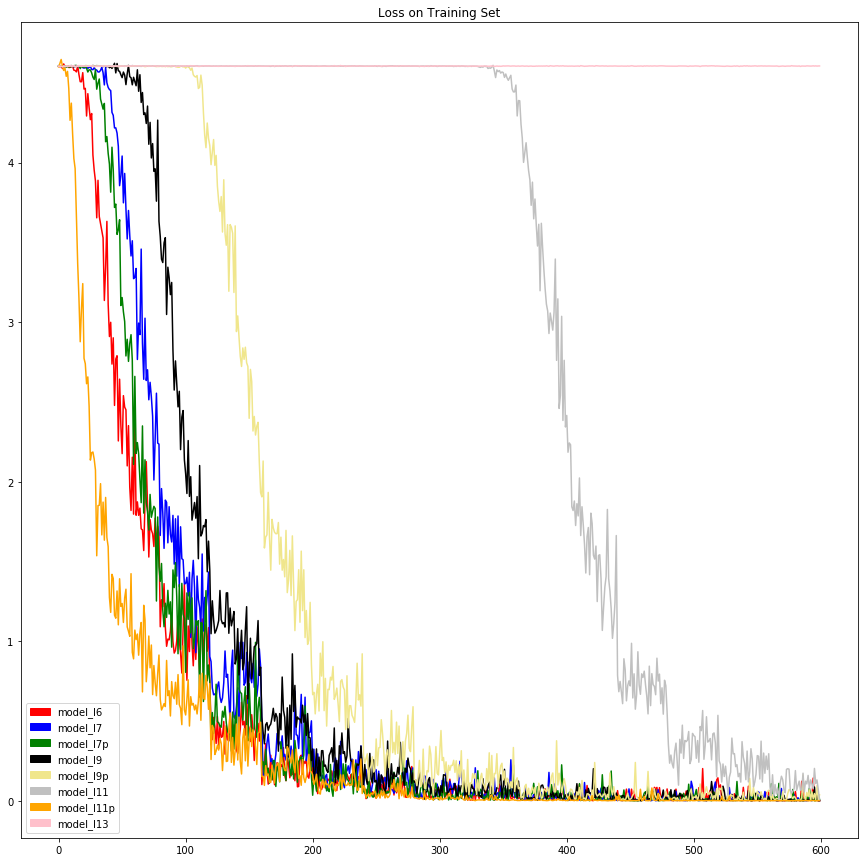

In [23]:
red_patch = mpatches.Patch(color='red', label='model_l6')
blue_patch = mpatches.Patch(color='blue', label='model_l7')
green_patch = mpatches.Patch(color='green', label='model_l7p')
black_patch = mpatches.Patch(color='black', label='model_l9')
khaki_patch = mpatches.Patch(color='khaki', label='model_l9p')
silver_patch = mpatches.Patch(color='silver', label='model_l11')
orange_patch = mpatches.Patch(color='orange', label='model_l11p')
pink_patch = mpatches.Patch(color='pink', label='model_l13')


plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'lower left')
plt.title('Loss on Training Set')
plt.plot(model_l6.all_losses, 'red')
plt.plot(model_l7.all_losses, 'blue')
plt.plot(model_l7p.all_losses, 'green')
plt.plot(model_l9.all_losses, 'black')
plt.plot(model_l9p.all_losses, 'khaki')
plt.plot(model_l11.all_losses, 'silver')
plt.plot(model_l11p.all_losses, 'orange')
plt.plot(model_l13.all_losses, 'pink')

plt.show()

plot accuracy

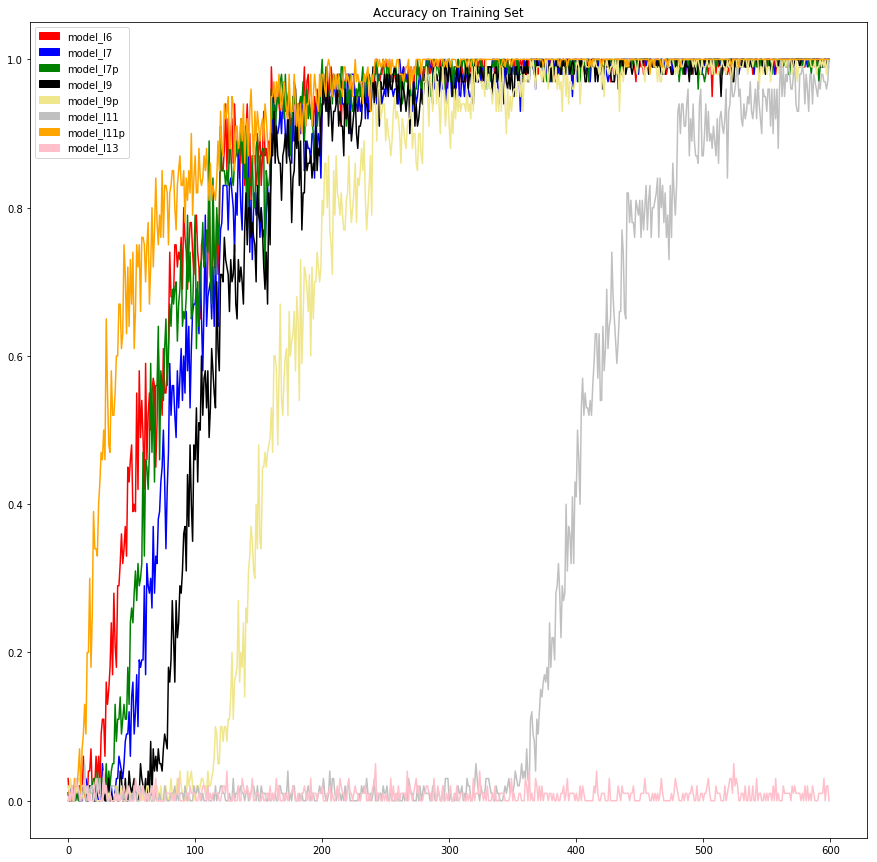

In [24]:
red_patch = mpatches.Patch(color='red', label='model_l6')
blue_patch = mpatches.Patch(color='blue', label='model_l7')
green_patch = mpatches.Patch(color='green', label='model_l7p')
black_patch = mpatches.Patch(color='black', label='model_l9')
khaki_patch = mpatches.Patch(color='khaki', label='model_l9p')
silver_patch = mpatches.Patch(color='silver', label='model_l11')
orange_patch = mpatches.Patch(color='orange', label='model_l11p')
pink_patch = mpatches.Patch(color='pink', label='model_l13')


plt.figure(figsize=(15, 15))
plt.legend(handles=[red_patch,blue_patch,green_patch,black_patch,khaki_patch,silver_patch,orange_patch,pink_patch]
           , loc = 'upper left')
plt.title('Accuracy on Training Set')
plt.plot(model_l6.all_accuracy, 'red')
plt.plot(model_l7.all_accuracy, 'blue')
plt.plot(model_l7p.all_accuracy, 'green')
plt.plot(model_l9.all_accuracy, 'black')
plt.plot(model_l9p.all_accuracy, 'khaki')
plt.plot(model_l11.all_accuracy, 'silver')
plt.plot(model_l11p.all_accuracy, 'orange')
plt.plot(model_l13.all_accuracy, 'pink')

plt.show()

The code in the document by <Houze Liu(s)> is licensed under the MIT License https://opensource.org/licenses/MIT